# Code for experimenting through various clustering methods 
_Author : Anirudh Sathish_


In [70]:
#importing neccesary libaries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [71]:
df = pd.read_csv("echocardiogram.csv")
print(df.head())

   survival  alive   age  pericardialeffusion  fractionalshortening    epss  \
0      11.0    0.0  71.0                  0.0                 0.260   9.000   
1      19.0    0.0  72.0                  0.0                 0.380   6.000   
2      16.0    0.0  55.0                  0.0                 0.260   4.000   
3      57.0    0.0  60.0                  0.0                 0.253  12.062   
4      19.0    1.0  57.0                  0.0                 0.160  22.000   

    lvdd  wallmotion-score  wallmotion-index   mult  name group  aliveat1  
0  4.600              14.0              1.00  1.000  name     1       0.0  
1  4.100              14.0              1.70  0.588  name     1       0.0  
2  3.420              14.0              1.00  1.000  name     1       0.0  
3  4.603              16.0              1.45  0.788  name     1       0.0  
4  5.750              18.0              2.25  0.571  name     1       0.0  


In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival              130 non-null    float64
 1   alive                 131 non-null    float64
 2   age                   126 non-null    float64
 3   pericardialeffusion   132 non-null    float64
 4   fractionalshortening  124 non-null    float64
 5   epss                  117 non-null    float64
 6   lvdd                  121 non-null    float64
 7   wallmotion-score      128 non-null    float64
 8   wallmotion-index      130 non-null    float64
 9   mult                  129 non-null    float64
 10  name                  131 non-null    object 
 11  group                 110 non-null    object 
 12  aliveat1              75 non-null     float64
dtypes: float64(11), object(2)
memory usage: 13.6+ KB
None


Notice that there are lot of empty rows in the above example 
Since we are just checking out data using clustering , we can decide to remove the aliveat1 column 


In [73]:
df.drop('aliveat1',axis=1,inplace=True)

In [74]:
# Lets look at the null values 
print(df.isnull().sum())

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
dtype: int64


Again name is not useful and will le a hindrance , so let us remove it 
Group is also meaningless and so is mult

In [75]:
df.drop(['name','group','mult'],axis = 1,inplace = True)

Lets drop the nan values in pericardial effusion

In [76]:
df = df[(df["pericardialeffusion"]==0) | (df["pericardialeffusion"] == 1)]

In [77]:
print(df.isnull().sum())

survival                 1
alive                    0
age                      5
pericardialeffusion      0
fractionalshortening     7
epss                    14
lvdd                    10
wallmotion-score         3
wallmotion-index         1
dtype: int64


In [78]:
print(df["fractionalshortening"])

0      0.260
1      0.380
2      0.260
3      0.253
4      0.160
       ...  
128    0.240
129    0.280
130    0.200
131    0.140
132    0.150
Name: fractionalshortening, Length: 131, dtype: float64


Lets fill in the rest of the missing data with their means

In [79]:
df = df.fillna(df.mean())

Let us save the alive data , and drop it from our initial dataframe 

In [80]:
output = df["alive"]
df.drop('alive',axis=1,inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 132
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival              131 non-null    float64
 1   age                   131 non-null    float64
 2   pericardialeffusion   131 non-null    float64
 3   fractionalshortening  131 non-null    float64
 4   epss                  131 non-null    float64
 5   lvdd                  131 non-null    float64
 6   wallmotion-score      131 non-null    float64
 7   wallmotion-index      131 non-null    float64
dtypes: float64(8)
memory usage: 9.2 KB
None


At this stage now we have obtained a cleaned version of the inital dataset 
Let us apply clustering over here and see how the data is 

Now before we cluster our data for insights , let us apply standardization 

In [81]:
from sklearn.preprocessing import StandardScaler

# Let us standradize 
stdScaler = StandardScaler()
scaledData = stdScaler.fit_transform(df)

Performing K means clustering 

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters =2)
kmeans.fit(scaledData)
grouping = kmeans.predict(scaledData)

/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
df_new_generate= pd.DataFrame(scaledData, columns = df.columns , index = df.index)

# Now let us add our predicted grouping 
df_new_generate["predictedGrouping_cluster2"] = grouping

In [84]:
# For cluster size 3 
kmeans = KMeans(n_clusters =3)
kmeans.fit(scaledData)
grouping = kmeans.predict(scaledData)

# Now let us add our predicted grouping 
df_new_generate["predictedGrouping_cluster3"] = grouping


/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
# For cluster size 4 
kmeans = KMeans(n_clusters =4)
kmeans.fit(scaledData)
grouping = kmeans.predict(scaledData)

# Now let us add our predicted grouping 
df_new_generate["predictedGrouping_cluster4"] = grouping


/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
# For cluster size 5 
kmeans = KMeans(n_clusters =5)
kmeans.fit(scaledData)
grouping = kmeans.predict(scaledData)


# Now let us add our predicted grouping 
df_new_generate["predictedGrouping_cluster5"] = grouping


/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
# For cluster size 7 
kmeans = KMeans(n_clusters =7)
kmeans.fit(scaledData)
grouping = kmeans.predict(scaledData)
# Now let us add our predicted grouping 
df_new_generate["predictedGrouping_cluster7"] = grouping


/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
print(df_new_generate.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 132
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   survival                    131 non-null    float64
 1   age                         131 non-null    float64
 2   pericardialeffusion         131 non-null    float64
 3   fractionalshortening        131 non-null    float64
 4   epss                        131 non-null    float64
 5   lvdd                        131 non-null    float64
 6   wallmotion-score            131 non-null    float64
 7   wallmotion-index            131 non-null    float64
 8   predictedGrouping_cluster2  131 non-null    int32  
 9   predictedGrouping_cluster3  131 non-null    int32  
 10  predictedGrouping_cluster4  131 non-null    int32  
 11  predictedGrouping_cluster5  131 non-null    int32  
 12  predictedGrouping_cluster7  131 non-null    int32  
dtypes: float64(8), int32(5)
memory usag

In [89]:
# Finding out the metrics to compare all of these 
from sklearn.metrics import rand_score , adjusted_rand_score

# Now comparing rand_scores of all these
# Let us get rand_score by comparing with ground truth 
score_for_clusterSize2 = rand_score(df_new_generate["predictedGrouping_cluster2"],output)
print("Rand Index score for KNN with cluster size 2 :  ",score_for_clusterSize2)
score_for_clusterSize3 = rand_score(df_new_generate["predictedGrouping_cluster3"],output)
print("Rand Index score for KNN with cluster size 4 :  ",score_for_clusterSize3)
score_for_clusterSize4 = rand_score(df_new_generate["predictedGrouping_cluster4"],output)
print("Rand Index score for KNN with cluster size 4 :  ",score_for_clusterSize4)
score_for_clusterSize5 = rand_score(df_new_generate["predictedGrouping_cluster5"],output)
print("Rand Index score for KNN with cluster size 5 :  ",score_for_clusterSize5)
score_for_clusterSize7 = rand_score(df_new_generate["predictedGrouping_cluster7"],output)
print("Rand Index score for KNN with cluster size 7 :  ",score_for_clusterSize7)

Rand Index score for KNN with cluster size 2 :   0.6526130358191427
Rand Index score for KNN with cluster size 4 :   0.6110393423370523
Rand Index score for KNN with cluster size 4 :   0.5888432178508515
Rand Index score for KNN with cluster size 5 :   0.537874339401057
Rand Index score for KNN with cluster size 7 :   0.5220199647680563


In [90]:
# Now comparing adjusted_rand_scores of all these
# Let us get adjusted_rand_score by comparing with ground truth
score_for_clusterSize2 = adjusted_rand_score(
    df_new_generate["predictedGrouping_cluster2"], output)
print("Adjusted Rand Index score for KNN with cluster size 2 :  ", score_for_clusterSize2)
score_for_clusterSize3 = adjusted_rand_score(
    df_new_generate["predictedGrouping_cluster3"], output)
print("Adjusted Rand Index score for KNN with cluster size 4 :  ", score_for_clusterSize3)
score_for_clusterSize4 = adjusted_rand_score(
    df_new_generate["predictedGrouping_cluster4"], output)
print("Adjusted Rand Index score for KNN with cluster size 4 :  ", score_for_clusterSize4)
score_for_clusterSize5 = adjusted_rand_score(
    df_new_generate["predictedGrouping_cluster5"], output)
print("Adjusted Rand Index score for KNN with cluster size 5 :  ", score_for_clusterSize5)
score_for_clusterSize7 = adjusted_rand_score(
    df_new_generate["predictedGrouping_cluster7"], output)
print("Adjusted Rand Index score for KNN with cluster size 7 :  ", score_for_clusterSize7)


Adjusted Rand Index score for KNN with cluster size 2 :   0.2988614982993041
Adjusted Rand Index score for KNN with cluster size 4 :   0.24104196255072
Adjusted Rand Index score for KNN with cluster size 4 :   0.2110228868353951
Adjusted Rand Index score for KNN with cluster size 5 :   0.130904944211202
Adjusted Rand Index score for KNN with cluster size 7 :   0.11011604731456028


Hierachial clustering model

In [94]:
# Create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 


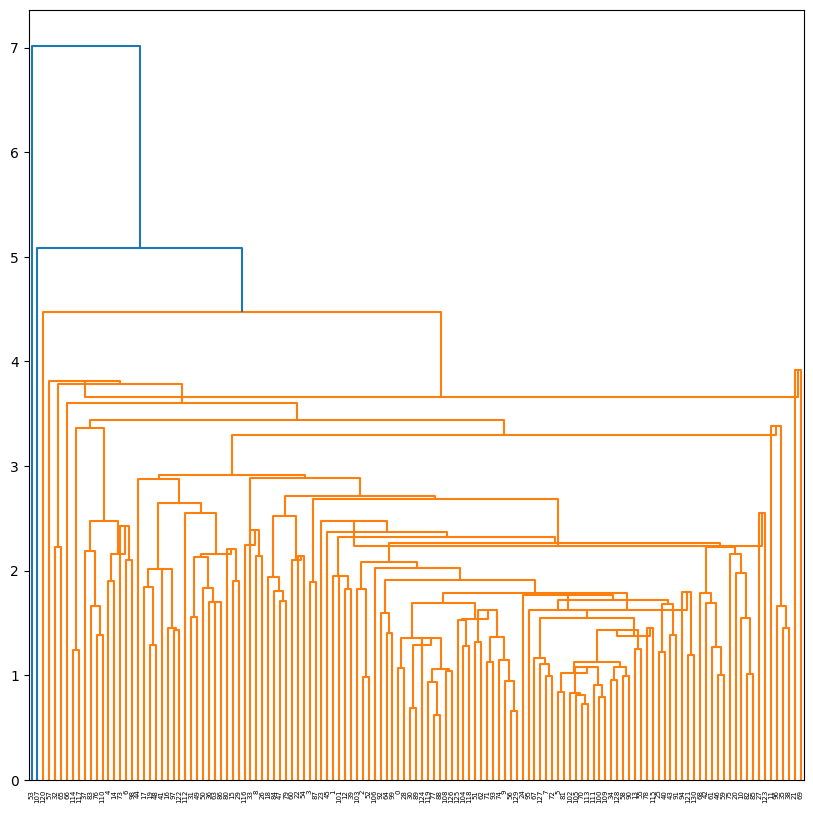

In [95]:
from scipy.cluster.hierarchy import dendrogram,linkage
z = linkage(scaledData,'centroid')
fig = plt.figure(figsize = (10,10))
dendro = dendrogram(z)
plt.show()

In [96]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=3)
clusters = hiercluster.fit_predict(scaledData)
df_new_generate["predictedClustering_cluster3"] = clusters
np.bincount(clusters) # count of data points in each cluster

/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([95, 22, 14])

In [97]:
# Read off 5 clusters:
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(scaledData) 
df_new_generate["predictedClustering_cluster5"] = clusters
np.bincount(clusters) # count of data points in each cluster

/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([22, 46, 14, 27, 22])

In [98]:
# Read off 4 clusters:
hiercluster.set_params(n_clusters=4)
clusters = hiercluster.fit_predict(scaledData)
df_new_generate["predictedClustering_cluster4"] = clusters 
np.bincount(clusters) # count of data points in each cluster

/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([49, 22, 14, 46])

In [99]:
# Read off 7 clusters:
hiercluster.set_params(n_clusters=7)
clusters = hiercluster.fit_predict(scaledData)
df_new_generate["predictedClustering_cluster7"] = clusters 
np.bincount(clusters) # count of data points in each cluster

/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([27, 23, 14, 13, 22,  9, 23])

In [100]:
# Read off 2 clusters:
hiercluster.set_params(n_clusters=2)
clusters = hiercluster.fit_predict(scaledData) 
df_new_generate["predictedClustering_cluster2"] = clusters
np.bincount(clusters) # count of data points in each cluster

/home/anirudh/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([36, 95])

In [101]:
# To get the metrics reading of Agglomerative Clustering 
# Now comparing rand_scores of all these
# Let us get rand_score by comparing with ground truth 
score_for_clusterSize2 = rand_score(df_new_generate["predictedClustering_cluster2"],output)
print("Rand Index score for Agglomerative Clustering with cluster size 2 :  ",score_for_clusterSize2)
score_for_clusterSize3 = rand_score(df_new_generate["predictedClustering_cluster3"],output)
print("Rand Index score for Agglomerative Clustering with cluster size 4 :  ",score_for_clusterSize3)
score_for_clusterSize4 = rand_score(df_new_generate["predictedClustering_cluster4"],output)
print("Rand Index score for Agglomerative Clustering with cluster size 4 :  ",score_for_clusterSize4)
score_for_clusterSize5 = rand_score(df_new_generate["predictedClustering_cluster5"],output)
print("Rand Index score for Agglomerative Clustering with cluster size 5 :  ",score_for_clusterSize5)
score_for_clusterSize7 = rand_score(df_new_generate["predictedClustering_cluster7"],output)
print("Rand Index score for Agglomerative Clustering with cluster size 7 :  ",score_for_clusterSize7)

Rand Index score for Agglomerative Clustering with cluster size 2 :   0.5915443335290663
Rand Index score for Agglomerative Clustering with cluster size 4 :   0.5915443335290663
Rand Index score for Agglomerative Clustering with cluster size 4 :   0.5471520845566648
Rand Index score for Agglomerative Clustering with cluster size 5 :   0.5513799177921316
Rand Index score for Agglomerative Clustering with cluster size 7 :   0.5029947152084556


In [102]:
# Let us get adjusted_rand_score by comparing with ground truth
score_for_clusterSize2 = adjusted_rand_score(
    df_new_generate["predictedClustering_cluster2"], output)
print("Adjusted Rand Index score for Agglomerative Clustering with cluster size 2 :  ", score_for_clusterSize2)
score_for_clusterSize3 = adjusted_rand_score(
    df_new_generate["predictedClustering_cluster3"], output)
print("Adjusted Rand Index score for Agglomerative Clustering with cluster size 4 :  ", score_for_clusterSize3)
score_for_clusterSize4 = adjusted_rand_score(
    df_new_generate["predictedClustering_cluster4"], output)
print("Adjusted Rand Index score for Agglomerative Clustering with cluster size 4 :  ",
      score_for_clusterSize4)
score_for_clusterSize5 = adjusted_rand_score(
    df_new_generate["predictedClustering_cluster5"], output)
print("Adjusted Rand Index score for Agglomerative Clustering with cluster size 5 :  ", score_for_clusterSize5)
score_for_clusterSize7 = adjusted_rand_score(
    df_new_generate["predictedClustering_cluster7"], output)
print("Adjusted Rand Index score for Agglomerative Clustering with cluster size 7 :  ", score_for_clusterSize7)

Adjusted Rand Index score for Agglomerative Clustering with cluster size 2 :   0.16481704479758597
Adjusted Rand Index score for Agglomerative Clustering with cluster size 4 :   0.1716308856525447
Adjusted Rand Index score for Agglomerative Clustering with cluster size 4 :   0.13334509150335666
Adjusted Rand Index score for Agglomerative Clustering with cluster size 5 :   0.15399751021061253
Adjusted Rand Index score for Agglomerative Clustering with cluster size 7 :   0.07743252597529841
